In [21]:
import pandas as pd
import matplotlib.pyplot as plt

### $\phi^4$ Theory

Toy Results for the action

$$ S = \int d^{d+1}x\, -\frac{1}{2}\partial_{\mu}\phi\partial^{\mu}\phi - \frac{1}{2}m^2\phi^2 - \frac{\lambda}{4!}\phi^,. $$

As a warmup, we'll look for zero temperature transitions which would arise from adjusting the parameters $m^2$ and $\lambda$. We'll do this via Hybrid Monte Carlo simulations, drawing samples from the distribution defined by the Euclidean action $$S_E = \int_0^{\beta}\int d^dx\, \frac{1}{2}\partial_{\mu}\phi \partial_{\mu}\phi + \frac{1}{2}m^2\phi^2 + \frac{\lambda}{4!}\phi^4\,,$$

with $\beta = \infty $.  We'll use the magnetization $M = \frac{1}{V}\int d^d x \,\phi(x)$ as the order parameter.

In [22]:
phase_plot = pd.read_csv('../Results/phi4/phases.csv', delimiter=',', index_col=False)
phase_plot

,m^2,lambda,nsteps,mag,abs mag
0,-3.0,0.5,50000,-5.994520,5.994520
1,-2.7,0.5,50000,-5.686510,5.686510
2,-2.4,0.5,50000,5.359800,5.359800
3,-2.1,0.5,50000,-5.013080,5.013080
4,-1.8,0.5,50000,-4.642240,4.642240
5,-1.5,0.5,50000,4.235340,4.235340
6,-1.2,0.5,50000,-3.785890,3.785890
7,-0.9,0.5,50000,3.269690,3.269690
8,-0.6,0.5,50000,-2.642330,2.642330
9,-0.3,0.5,50000,1.744960,1.744960


Text(0.5, 0, 'M^2')

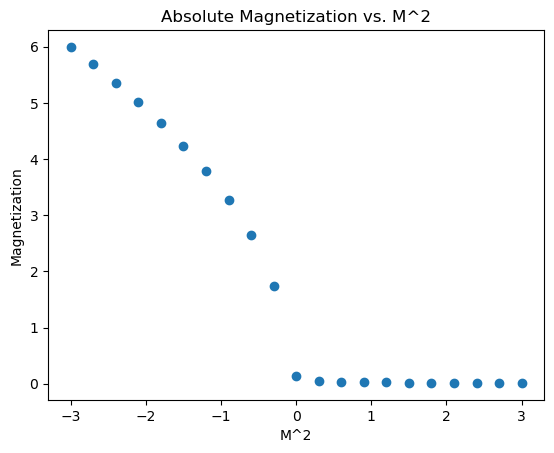

In [23]:
plt.scatter(phase_plot["m^2"], phase_plot["abs mag"])
plt.title("Absolute Magnetization vs. M^2")
plt.ylabel("Magnetization")
plt.xlabel("M^2")

Magnetization for $4^4$ lattice sites, $\lambda = 0.5$.  HMC params: $\epsilon = 0.5$, $\sigma^2 = 0.5$, $L=1$ (integration steps before Metroplis check).  When the effective mass squared term becomes negative, the theory has $Z^2$ symmetry and develops a magnetization

### $U(1)$ and $SU(2)$ Gauge Theory

Results for the Wilson Action

$$ S = \sum_{plaquettes} \beta\Big[1 - \frac{1}{n}\text{ReTr}\Big(U_{ij}U_{jk}U_{kl}U_{li}\Big)\Big],$$

where $n$ is the dimension of the gauge group.  We look for phase transitions as we very the "temperature" parameter beta controlling the gauge coupling. We use the average plaquette as our order parameter,

$$ P = <\frac{1}{n}\text{ReTr}\Big(U_{ij}U_{jk}U_{kl}U_{li}\Big)>$$
    

In [24]:
U1_phase_plot = pd.read_csv('../Results/U1/phases.csv', delimiter=',', index_col=False)
SU2_phase_plot = pd.read_csv('../Results/SU2/phases.csv', delimiter=',', index_col=False)

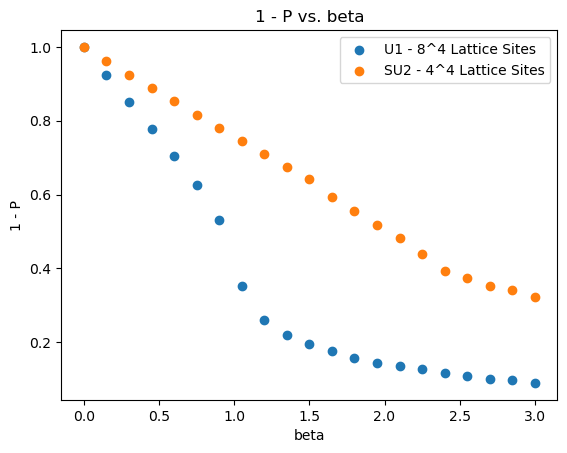

In [25]:
plt.scatter(U1_phase_plot["beta"], 1-U1_phase_plot["avg_plaq"], label="U1 - 8^4 Lattice Sites")
plt.scatter(SU2_phase_plot["beta"], 1-SU2_phase_plot["avg_plaq"], label="SU2 - 4^4 Lattice Sites")

plt.title("1 - P vs. beta")
plt.ylabel("1 - P")
plt.xlabel("beta")

plt.legend()


HMC params: $\epsilon = 0.5$, $\sigma^2 = 1$, $L=1$ (integration steps before Metroplis check).  The model exhibits an artifical phase transitions around $\beta = 1$ for $U(1)$ and $\beta = 2.5$ for $SU(2)$.